# Thesis project

In [1]:
# !pip install pandas openpyxl
# !pip install graphviz pretty_confusion_matrix pydotplus shap kneed
# !pip install scikit-learn==1.2.2

## Import packages

In [2]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))


In [3]:
1#general
import pandas as pd
import numpy as np
from scipy import stats
import statistics
from sklearn.preprocessing import scale
from scipy.stats import t
from sklearn.preprocessing import StandardScaler

In [4]:
# Import relevant packages for Lasso & Data Splitting
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [5]:
import seaborn as sns

In [6]:
#Import relevant packages for 
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [7]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import  confusion_matrix, precision_score, recall_score

In [8]:
import matplotlib.pyplot as plt
from matplotlib import colors
import warnings; warnings.simplefilter('ignore')

In [9]:
from imblearn.over_sampling import SMOTE
from imblearn import pipeline as pl 
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_recall_curve, auc

In [10]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [11]:
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedGroupKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [13]:
# from sklearn.metrics import confusion_matrix
# from pretty_confusion_matrix import pp_matrix_from_data

## Import data

In [14]:
# Import Y DataFrame from CSV
data_Y_s= pd.read_csv('G:\\Mi unidad\\PUCP\\2021-2\\TESIS_1\\3_datos\\data_Y_s_271223_1_2.csv')

# Import X DataFrame from CSV
data_m = pd.read_csv('G:\\Mi unidad\\PUCP\\2021-2\\TESIS_1\\3_datos\\data_m_271223_1_2.csv')

In [15]:
# data_Y_s=data_Y_s1[:1000]
# data_m=data_m1[:1000]

**Pregunta: i) deberia exportar la matriz de correlacion? o por partes (si alcanza tiempo)**

## CV Stratified

### Data Splitting

Here, we split the observations in 2 samples: the training set and the test set. Let's remember that our test set is composed from data collected between 2016 to 2019, and we are going test on a data set componsed of a little bit of each year. However, we are going to predict in 2020 and compare with what really happened. 

To begin with, we must create the X and y that are going to pass throught data splitting into training and test set. 

In [16]:
x_main_pre =  data_m.drop(['num_panel'], axis=1)
y_main_pre = data_Y_s.loc[:,('deg_desemp', 'ano_19')]
groups_pre = data_m[['ano_reg', 'ano_19']]

In [17]:
x_main_pre

,p401c,p401f,p401h1,p401h2,p4193,p4194,p4196,p4197,p4198,p22,...,p111a_5,sector_6,ano_16,ano_17,ano_18,ano_19,regnat_1,regnat_2,regnat_3,ano_reg
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,2
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,2
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,1,0,0,1,0,8
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,1,0,0,0,1,0,5
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,2
20221,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,1,0,0,1,0,8
20222,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,2
20223,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,1,0,0,1,0,8


In [18]:
# # Create an empty list to store the names of continuous variables
# continuous_cols = []

# # Set a threshold for the number of unique values to distinguish categorical from continuous variables
# unique_value_threshold = 8

# # Iterate through the columns and identify continuous variables
# for col in x_main_pre.columns:
#     # Check if the column is numeric
#     if x_main_pre[col].dtype in [int, float]:
#         # Check the number of unique values in the column
#         num_unique_values = x_main_pre[col].nunique()
        
#         # Consider it as continuous only if the number of unique values is above the threshold
#         if num_unique_values > unique_value_threshold:
#             continuous_cols.append(col)
        
#         # Print column name and data type
#         print(f"{col}: {x_main_pre[col].dtype}")

# # Now 'continuous_cols' will contain the names of continuous variables in the DataFrame
# print("Continuous Variables:", continuous_cols)


In [19]:
continous_col_total = [
    'y_pri_dep', 'y_pri_indep', 'y_pri', 'y_sec_dep', 'y_sec_ind', 'y_sec', 'y_mkt',
    'pobre2', 'gpcm', 'ingtrabw', 'ipcr_0', 'ipcr_1', 'ipcr_2', 'ipcr_3', 'ipcr_4',
    'ipcr_5', 'ipcr_6', 'ipcr_7', 'ipcr_8', 'ipcr_9', 'ipcr_10', 'ipcr_11', 'ipcr_12',
    'ipcr_13', 'ipcr_14', 'ipcr_15', 'ipcr_16', 'ipcr_17', 'ipcr_18', 'ipcr_19', 'ipcr_20',
    'gpgru1', 'gpgru2', 'gpgru3', 'gpgru4', 'gpgru5', 'gpgru6', 'gpgru7', 'gpgru8', 'gpgru9',
    'gpgru10', 'p104a', 'i1172_01', 'i1172_02', 'i1173_01', 'i1173_02', 'p208a', 'p512a', 'p513t',
    'n_edad_prim', 'n_edad_sec', 'n_edad_esc', 'n_matr_prim', 'n_matr_sec', 'n_matr_esc'
    
    ,'p203a'
]

f_cont_total = list(set(continous_col_total).intersection(x_main_pre.columns))

In [20]:
x_train_i = x_main_pre.loc[x_main_pre['ano_19'] != 1].drop(['ano_19'], axis=1)
y_train = y_main_pre.loc[y_main_pre['ano_19'] != 1].drop(['ano_19'], axis=1)

x_test_i = x_main_pre.loc[x_main_pre['ano_19'] == 1].drop(['ano_19'], axis=1)
y_test  = y_main_pre.loc[y_main_pre['ano_19'] == 1].drop(['ano_19'], axis=1)

groups = groups_pre.loc[x_main_pre['ano_19'] != 1].drop(['ano_19'], axis=1)

In [21]:
#x_train_i['gpgru7'].isnull().sum()

In [22]:
# # Extract continuous and non-continuous columns from x_train_i
# x_train_continuous = x_train_i[f_cont_total]
# x_train_non_continuous = x_train_i.drop(columns=f_cont_total)
# x_train_continuous.isnull().sum()
# # Scale the continuous columns
# std = StandardScaler()

# scaled_continuous = pd.DataFrame(std.fit_transform(x_train_continuous))
# scaled_continuous                             
# #scaled_continuous.isnull().sum()
# # Create a new DataFrame with scaled continuous columns and non-continuous columns
# x_train = pd.concat([scaled_continuous, x_train_non_continuous], axis=1)
# x_train
# x_train['gpgru7'].isnull().sum()
# duplicated_columns = x_train.columns[x_train.columns.duplicated()]
# print("Duplicated columns: ", duplicated_columns)

In [23]:
x_train = pd.DataFrame(scale(x_train_i), columns=x_train_i.columns)
#y_train = pd.DataFrame(scaler.fit_transform(y_train_i), columns=y_train_i.columns)

x_test = pd.DataFrame(scale(x_test_i), columns=x_test_i.columns)
#y_test  = pd.DataFrame(scaler.fit_transform(y_test_i), columns=y_test_i.columns)

In [24]:
x_train

,p401c,p401f,p401h1,p401h2,p4193,p4194,p4196,p4197,p4198,p22,...,dpto_23,p111a_5,sector_6,ano_16,ano_17,ano_18,regnat_1,regnat_2,regnat_3,ano_reg
0,0.028699,0.215199,-0.106245,-0.065395,-0.094436,-0.133152,-0.093035,-0.008033,-0.055151,-0.33035,...,-0.230046,-0.165664,-0.057458,1.995495,-0.806916,-0.824908,-1.133123,1.709621,-0.473142,-1.362738
1,0.028699,0.215199,-0.106245,-0.065395,-0.094436,-0.133152,-0.093035,-0.008033,-0.055151,-0.33035,...,-0.230046,-0.165664,-0.057458,1.995495,-0.806916,-0.824908,-1.133123,1.709621,-0.473142,-1.362738
2,0.028699,0.215199,-0.106245,-0.065395,-0.094436,-0.133152,-0.093035,-0.008033,-0.055151,-0.33035,...,-0.230046,-0.165664,-0.057458,-0.501129,-0.806916,1.212257,-1.133123,1.709621,-0.473142,1.166025
3,0.028699,0.215199,-0.106245,-0.065395,-0.094436,-0.133152,-0.093035,-0.008033,-0.055151,-0.33035,...,-0.230046,-0.165664,-0.057458,-0.501129,1.239287,-0.824908,-1.133123,1.709621,-0.473142,-0.098356
4,0.028699,0.215199,-0.106245,-0.065395,-0.094436,-0.133152,-0.093035,-0.008033,-0.055151,-0.33035,...,-0.230046,-0.165664,-0.057458,1.995495,-0.806916,-0.824908,-1.133123,1.709621,-0.473142,-1.362738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15494,0.028699,0.215199,-0.106245,-0.065395,-0.094436,-0.133152,-0.093035,-0.008033,-0.055151,-0.33035,...,-0.230046,-0.165664,-0.057458,1.995495,-0.806916,-0.824908,-1.133123,1.709621,-0.473142,-1.362738
15495,0.028699,0.215199,-0.106245,-0.065395,-0.094436,-0.133152,-0.093035,-0.008033,-0.055151,-0.33035,...,-0.230046,-0.165664,-0.057458,-0.501129,-0.806916,1.212257,-1.133123,1.709621,-0.473142,1.166025
15496,0.028699,0.215199,-0.106245,-0.065395,-0.094436,-0.133152,-0.093035,-0.008033,-0.055151,-0.33035,...,-0.230046,-0.165664,-0.057458,1.995495,-0.806916,-0.824908,-1.133123,1.709621,-0.473142,-1.362738
15497,0.028699,0.215199,-0.106245,-0.065395,-0.094436,-0.133152,-0.093035,-0.008033,-0.055151,-0.33035,...,-0.230046,-0.165664,-0.057458,-0.501129,-0.806916,1.212257,-1.133123,1.709621,-0.473142,1.166025


Let's remember the train set is going to be used to train the model (by simulating a lot of samples using the CV) and the test set is going to be used to test the model out-of-sample. 

In [25]:
X = pd.concat([x_train, x_test], ignore_index=True)
Y = pd.concat([y_train, y_test], ignore_index=True)

We have 193 variables in the model.

For the Stratified Group CV, we need to determine the variable groups that the code will interpret as groups of the x variables and the class will depend on the "groups" of y (2 classes: employment and nonemployment).

In [26]:
missing_counts = x_train.isna().sum().sort_values()
n = 15  # Number of last values you want to print
last_n_values = missing_counts[-n:]

#print(last_n_values)

## Estimations

### Choosing the optimal lambda using grid search

We establish a a grid of posibles values for $\lambda$ using grid search. It starts at the value of 0 and then we started trying with different maximun values, as well as differente intervals between the values (that depend on the number of $\lambda$ we are planning to incluide.


In [27]:
#determining a set of lambdas to test wich one is the best
l_min = 0.001
l_max = 500
l_num = 1000
l_num_div=np.int(l_num/2)
lambdas = np.linspace(l_min,l_max, l_num)
lambdas

array([1.00000000e-03, 5.01499499e-01, 1.00199900e+00, 1.50249850e+00,
       2.00299800e+00, 2.50349750e+00, 3.00399700e+00, 3.50449650e+00,
       4.00499600e+00, 4.50549550e+00, 5.00599499e+00, 5.50649449e+00,
       6.00699399e+00, 6.50749349e+00, 7.00799299e+00, 7.50849249e+00,
       8.00899199e+00, 8.50949149e+00, 9.00999099e+00, 9.51049049e+00,
       1.00109900e+01, 1.05114895e+01, 1.10119890e+01, 1.15124885e+01,
       1.20129880e+01, 1.25134875e+01, 1.30139870e+01, 1.35144865e+01,
       1.40149860e+01, 1.45154855e+01, 1.50159850e+01, 1.55164845e+01,
       1.60169840e+01, 1.65174835e+01, 1.70179830e+01, 1.75184825e+01,
       1.80189820e+01, 1.85194815e+01, 1.90199810e+01, 1.95204805e+01,
       2.00209800e+01, 2.05214795e+01, 2.10219790e+01, 2.15224785e+01,
       2.20229780e+01, 2.25234775e+01, 2.30239770e+01, 2.35244765e+01,
       2.40249760e+01, 2.45254755e+01, 2.50259750e+01, 2.55264745e+01,
       2.60269740e+01, 2.65274735e+01, 2.70279730e+01, 2.75284725e+01,
      

In [28]:
de_lambda=np.std(lambdas)

In [29]:
your_seed=13

In [30]:
l_num_div

500

In [31]:
# from flaml import AutoML
# y_train_array = y_train.values
# # Define the pipeline with a search space for hyperparameters
# def get_pipeline(under_sampler__sampling_strategy, logistic_regression__C):
#     return make_pipeline(
#         RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42),
#         LogisticRegression(C=C, penalty='l1', solver='liblinear', random_state=42)
#     )

# # Specify the hyperparameter search space
# param_space = {
#     'under_sampler__sampling_strategy': ('auto', 0.5, 0.8),
#     'logistic_regression__C': (0.001, 0.01, 0.1, 1, 10),
# }

# # Create an AutoML instance
# automl = AutoML()

# # Run FLAML to search for the best hyperparameters
# automl.fit(X_train=x_train, y_train=y_train_array, task='classification', estimator_list=[('pipeline', get_pipeline, param_space)])

# # Print the best pipeline configuration and its performance
# print(automl.best_estimator)
# print(automl.best_config)
# print(automl.best_loss)

In [32]:
y_train.head()

,deg_desemp
0,0
1,0
2,0
3,0
4,0


## 1. Logit penalizado con Undersampling

In [33]:
training_scores = []
testing_scores = []
coefficients = [] 

In [34]:
for ind, i in enumerate(lambdas):
    # Create a pipeline with RandomUnderSampler and LogisticRegression with L1 penalty
    reg = pl.make_pipeline(
        RandomUnderSampler(random_state=your_seed),
        LogisticRegression(C=1/i, penalty='l1', solver='liblinear', random_state=your_seed)
    )
    
    reg.fit(x_train, y_train)
    
    skf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=your_seed)
    results = cross_validate(reg, x_train, y_train, groups=groups, cv=skf, scoring="roc_auc", return_train_score=True)
    
    # Append the training and testing score means to the lists
    training_scores.append(results['train_score'].mean())
    testing_scores.append(results['test_score'].mean())
    
    # Capture the coefficients
    coefficients.append(reg.named_steps['logisticregression'].coef_.flatten())

In [35]:
# training_scores
#testing_scores

In [41]:
#confidence intervals

# Number of bootstrap samples
num_bootstrap_samples = 1000

# Initialize an array to store bootstrap samples for 
bootstrap_samples_test = np.zeros((num_bootstrap_samples, len(testing_scores)))

# Perform bootstrapping
for i in range(num_bootstrap_samples):
    # Resample with replacement
    bootstrap_sample_test = resample(testing_scores)
    bootstrap_samples_test[i, :] = bootstrap_sample_test
    

# Initialize an array to store bootstrap samples
bootstrap_samples_tra = np.zeros((num_bootstrap_samples, len(training_scores)))

# Perform bootstrapping
for i in range(num_bootstrap_samples):
    # Resample with replacement
    bootstrap_sample_tra = resample(training_scores)
    bootstrap_samples_tra[i, :] = bootstrap_sample_tra

    

# Calculate mean and percentiles for confidence intervals
mean_scores_test = np.mean(bootstrap_samples_test, axis=0)
lower_bound_test = np.percentile(bootstrap_samples_test, 2.5, axis=0)
upper_bound_test = np.percentile(bootstrap_samples_test, 97.5, axis=0)

# Calculate mean and percentiles for confidence intervals
mean_scores_tra = np.mean(bootstrap_samples_tra, axis=0)
lower_bound_tra = np.percentile(bootstrap_samples_tra, 2.5, axis=0)
upper_bound_tra = np.percentile(bootstrap_samples_tra, 97.5, axis=0)

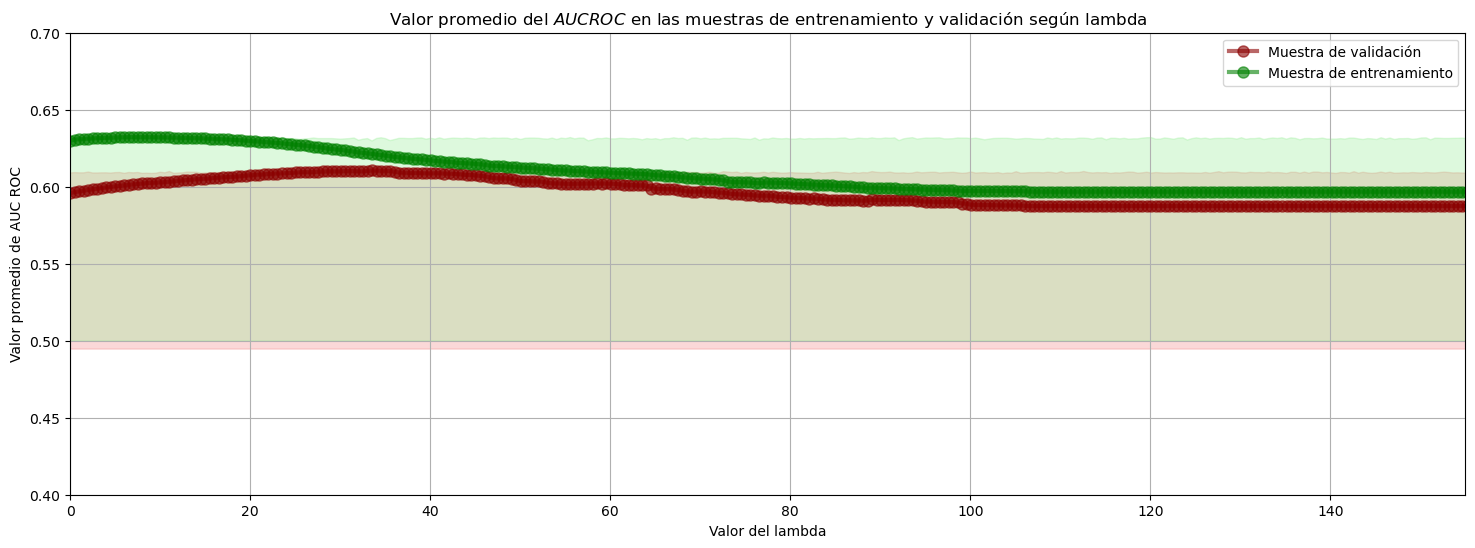

In [51]:
plt.figure(figsize=(18,6))

#plt.plot(np.std(testing_scores)+(testing_scores), 'bo-', label=r'Intervalos de confianza', color="darkblue", marker = "o",markersize = 8,  alpha=0.6, linewidth=3)
plt.plot(lambdas, testing_scores, label=r'Muestra de validación', color="darkred", marker = "o", markersize=8, alpha=0.6, linewidth=3)
#plt.plot((testing_scores)-np.std(testing_scores), 'bo-', marker = "o", color="darkblue", alpha=0.6, linewidth=3)
plt.fill_between(lambdas, lower_bound_test, upper_bound_test, color='lightcoral', alpha=0.3)

#plt.plot(np.std(training_scores)+(training_scores), 'bo-', color="darkblue", marker = "o",markersize = 8,  alpha=0.6, linewidth=3)
plt.plot(lambdas, training_scores, label=r'Muestra de entrenamiento', color="green", marker = "o", markersize=8, alpha=0.6, linewidth=3)
#plt.plot((training_scores)-np.std(training_scores), 'bo-', marker = "o", color="darkblue", alpha=0.6, linewidth=3)
plt.fill_between(lambdas, lower_bound_tra, upper_bound_tra, color='lightgreen', alpha=0.3)


plt.xlabel('Valor del lambda'); plt.ylabel('Valor promedio de AUC ROC')
plt.xlim(0,155)
plt.ylim(0.4,0.7)
plt.title('Valor promedio del $AUC ROC$ en las muestras de entrenamiento y validación según lambda')
plt.legend(loc='best')
plt.grid()

plt.savefig('G:\\Mi unidad\\PUCP\\2021-2\\TESIS_1\\4_grafico\\precision_1_lambda_completo_1_2.png')

In [48]:
#hallamos el lambda que maximiza el precision
df_lam = pd.DataFrame(testing_scores, columns=['metric'])
df_lam['lambda'] = (lambdas)
lamb_opt = df_lam.loc[df_lam['metric'].idxmax()]
lamb_opt

lambda_optimal = lamb_opt['lambda']
lamb_opt

metric     0.610564
lambda    33.534466
Name: 67, dtype: float64

In [49]:
mean_metric_test = np.mean(df_lam['metric'], axis=0)
mean_metric_test

0.5345542686301783

In [50]:
df_lam_tra = pd.DataFrame(training_scores, columns=['metric'])
mean_metric_tra = np.mean(df_lam_tra['metric'], axis=0)
mean_metric_tra

0.5418923082007063

In [38]:
coefficients = np.array(coefficients)

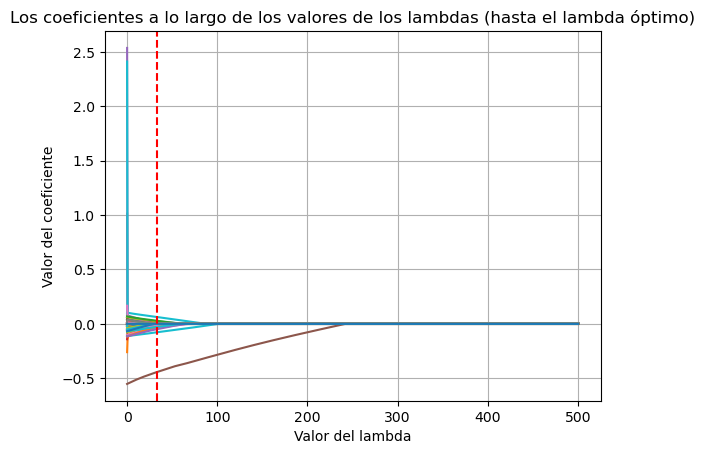

<Figure size 640x480 with 0 Axes>

In [72]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a numpy array 'lambdas' containing your lambda values
# and 'coefficients' is a numpy array with shape (number_of_lambda_values, number_of_features)
# You want to plot coefficients for the first 20 lambdas

# Plot lambda-coefficient graph for all coefficients on the same graph
for feature_index in range(coefficients.shape[1]):
    plt.plot(lambdas[:l_num], coefficients[:l_num, feature_index], label=f'Valor del coeficiente {feature_index}')

    # Add a vertical line at x = 16.2
plt.axvline(x=lambda_optimal, color='red', linestyle='--', label='Vertical Line at x=16.2')

plt.xlabel('Valor del lambda')
plt.ylabel('Valor del coeficiente')
plt.title('Los coeficientes a lo largo de los valores de los lambdas (hasta el lambda óptimo)')
plt.grid(True)
# plt.legend(loc='best')
plt.show()
plt.savefig('G:\\Mi unidad\\PUCP\\2021-2\\TESIS_1\\4_grafico\\coeficiente_lambda_1_completo_1_2.png')

In [52]:
coef_dataframe= pd.DataFrame(coefficients)
coef_lambda = pd.concat([coef_dataframe, df_lam], axis=1)
filtered_coef_df = coef_lambda[coef_lambda['lambda'] == lambda_optimal]

columns_to_drop = ['metric', 'lambda']
filtered_coef_df.drop(columns=columns_to_drop, inplace=True)

non_zero_values = filtered_coef_df.iloc[0].sort_values()
non_zero_values

65   -0.441559
59   -0.076657
64   -0.047939
9    -0.037317
36   -0.036795
        ...   
48    0.019217
12    0.019431
27    0.023576
72    0.028075
19    0.063533
Name: 67, Length: 91, dtype: float64

In [53]:
min_value_coef=0.1

non_zero_variable_names = non_zero_values[non_zero_values.abs() > min_value_coef]

In [54]:
nzvn = non_zero_values[non_zero_values.abs() > min_value_coef].index.tolist()

In [55]:
# Select columns by index
selected_columns = x_test.iloc[:, nzvn]
#export data
# Export Y DataFrame to CSV
selected_columns.to_csv('G://Mi unidad//PUCP//2021-2//TESIS_1//3_datos//test_data_varl_1_2.csv', index=False)

In [42]:
column_info_list = list(zip(selected_columns.columns, nzvn))
column_info_df = pd.DataFrame(column_info_list, columns=['ColumnName', 'NZVN'])

m_values_columns = pd.merge(column_info_df, non_zero_values, left_on='NZVN', right_index=True)
m_values_columns

,ColumnName,NZVN,67
0,y_mkt,65,-0.441559


In [56]:
absolute_values = non_zero_values.abs().sort_values()
nzvn_10 = absolute_values.tail(10).index.tolist()

# Select columns by index
selected_columns_10 = x_test.iloc[:, nzvn_10]

#export data
# Export Y DataFrame to CSV
selected_columns_10.to_csv('G://Mi unidad//PUCP//2021-2//TESIS_1//3_datos//test_data_var_1_10.csv', index=False)


In [57]:
column_info_list_10 = list(zip(selected_columns_10.columns, nzvn_10))
column_info_df_10 = pd.DataFrame(column_info_list_10, columns=['ColumnName', 'NZVN'])

m_values_columns_10 = pd.merge(column_info_df_10, absolute_values, left_on='NZVN', right_index=True)
m_values_columns_10

,ColumnName,NZVN,67
0,p102_6.0,27,0.023576
1,p203_1,69,0.027751
2,p102_5.0,72,0.028075
3,p401h5,61,0.028375
4,p103a_8.0,36,0.036795
5,p22,9,0.037317
6,y_sec,64,0.047939
7,n_matr_sec,19,0.063533
8,p208a,59,0.076657
9,y_mkt,65,0.441559


## 2. Logit penalizado con SMOTE

In [43]:
training_scores2 = []
testing_scores2 = []
coefficients2 = [] 

In [44]:
for ind, i in enumerate(lambdas):
    # Create a pipeline with RandomUnderSampler and LogisticRegression with L1 penalty
    reg2 = pl.make_pipeline(
        SMOTE(random_state=your_seed),
        LogisticRegression(C=1/i, penalty='l1', solver='liblinear', random_state=your_seed)
    )
    
    reg2.fit(x_train, y_train)
    
    skf2 = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=your_seed)
    results2 = cross_validate(reg2, x_train, y_train, groups=groups, cv=skf2, scoring="roc_auc", return_train_score=True)
    
    # Append the training and testing score means to the lists
    training_scores2.append(results2['train_score'].mean())
    testing_scores2.append(results2['test_score'].mean())
    
    # Capture the coefficients
    coefficients2.append(reg2.named_steps['logisticregression'].coef_.flatten())

In [88]:
#confidence intervals

# Number of bootstrap samples
num_bootstrap_samples = 1000

# Initialize an array to store bootstrap samples for 
bootstrap_samples_test2 = np.zeros((num_bootstrap_samples, len(testing_scores2)))

# Perform bootstrapping
for i in range(num_bootstrap_samples):
    # Resample with replacement
    bootstrap_sample_test2 = resample(testing_scores2)
    bootstrap_samples_test2[i, :] = bootstrap_sample_test2
    

# Initialize an array to store bootstrap samples
bootstrap_samples_tra2 = np.zeros((num_bootstrap_samples, len(training_scores2)))

# Perform bootstrapping
for i in range(num_bootstrap_samples):
    # Resample with replacement
    bootstrap_sample_tra2 = resample(training_scores2)
    bootstrap_samples_tra2[i, :] = bootstrap_sample_tra2

    

# Calculate mean and percentiles for confidence intervals
mean_scores_test2 = np.mean(bootstrap_samples_test2, axis=0)
lower_bound_test2 = np.percentile(bootstrap_samples_test2, 2.5, axis=0)
upper_bound_test2 = np.percentile(bootstrap_samples_test2, 97.5, axis=0)

# Calculate mean and percentiles for confidence intervals
mean_scores_tra2 = np.mean(bootstrap_samples_tra2, axis=0)
lower_bound_tra2 = np.percentile(bootstrap_samples_tra2, 2.5, axis=0)
upper_bound_tra2 = np.percentile(bootstrap_samples_tra2, 97.5, axis=0)

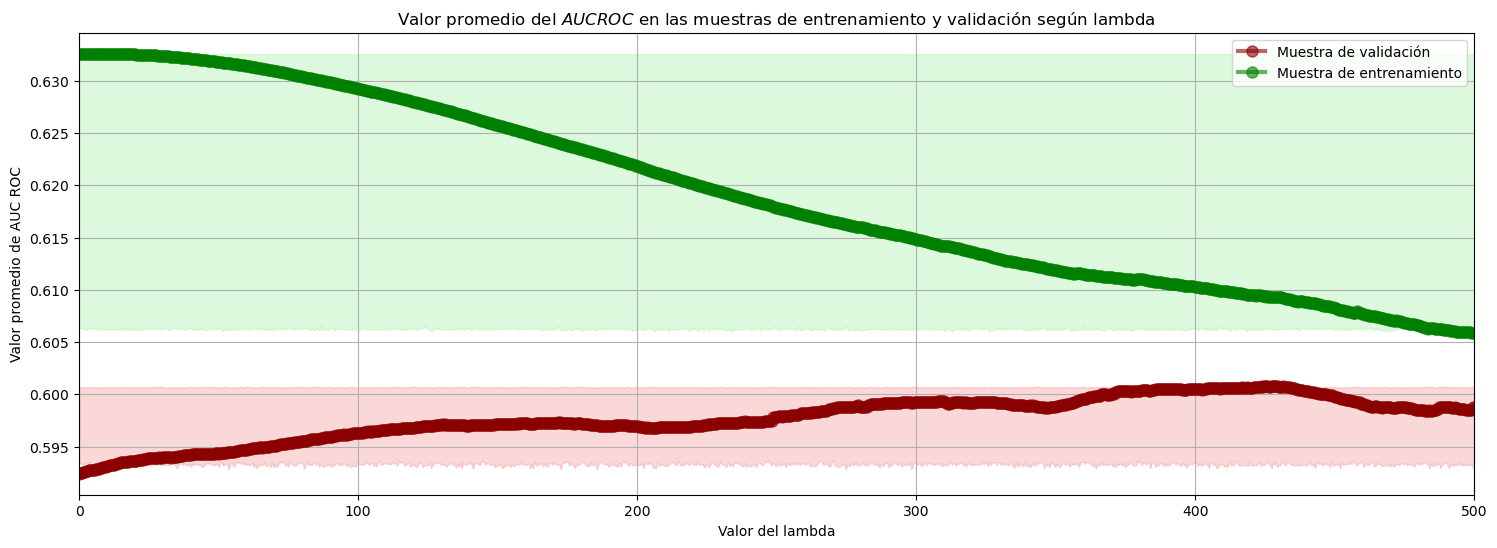

In [89]:
plt.figure(figsize=(18,6))

# plt.plot(np.std(testing_scores2)+(testing_scores2), 'bo-', label=r'Intervalos de confianza', color="darkblue", marker = "o",markersize = 8,  alpha=0.6, linewidth=3)
plt.plot(lambdas, testing_scores2, label=r'Muestra de validación', color="darkred", marker = "o", markersize=8, alpha=0.6, linewidth=3)
# plt.plot((testing_scores2)-np.std(testing_scores2), 'bo-', marker = "o", color="darkblue", alpha=0.6, linewidth=3)
plt.fill_between(lambdas, lower_bound_test2, upper_bound_test2, color='lightcoral', alpha=0.3)

# plt.plot(np.std(training_scores2)+(training_scores2), 'bo-', color="darkblue", marker = "o",markersize = 8,  alpha=0.6, linewidth=3)
plt.plot(lambdas, training_scores2, label=r'Muestra de entrenamiento', color="green", marker = "o", markersize=8, alpha=0.6, linewidth=3)
# plt.plot((training_scores2)-np.std(training_scores2), 'bo-', marker = "o", color="darkblue", alpha=0.6, linewidth=3)
plt.fill_between(lambdas, lower_bound_tra2, upper_bound_tra2, color='lightgreen', alpha=0.3)


plt.xlabel('Valor del lambda'); plt.ylabel('Valor promedio de AUC ROC')
plt.xlim(0,l_max)
#plt.ylim(0,1)
plt.title('Valor promedio del $AUC ROC$ en las muestras de entrenamiento y validación según lambda')
plt.legend(loc='best')
plt.grid()

plt.savefig('G:\\Mi unidad\\PUCP\\2021-2\\TESIS_1\\4_grafico\\precision_2_lambda_completo_1_2.png')

In [90]:
#hallamos el lambda que maximiza el precision
df_lam2 = pd.DataFrame(testing_scores2, columns=['metric'])
df_lam2['lambda'] = (lambdas)
lamb_opt2 = df_lam2.loc[df_lam2['metric'].idxmax()]
lambda_optimal2 = lamb_opt2['lambda']
lamb_opt2

metric      0.600794
lambda    428.428572
Name: 856, dtype: float64

In [92]:
mean_metric_test2 = np.mean(df_lam2['metric'], axis=0)
mean_metric_test2

0.5977288421321784

In [93]:
df_lam_tra2 = pd.DataFrame(training_scores2, columns=['metric'])
mean_metric_tra2 = np.mean(df_lam_tra2['metric'], axis=0)
mean_metric_tra2

0.619118525636736

In [94]:
coefficients2 = np.array(coefficients2)

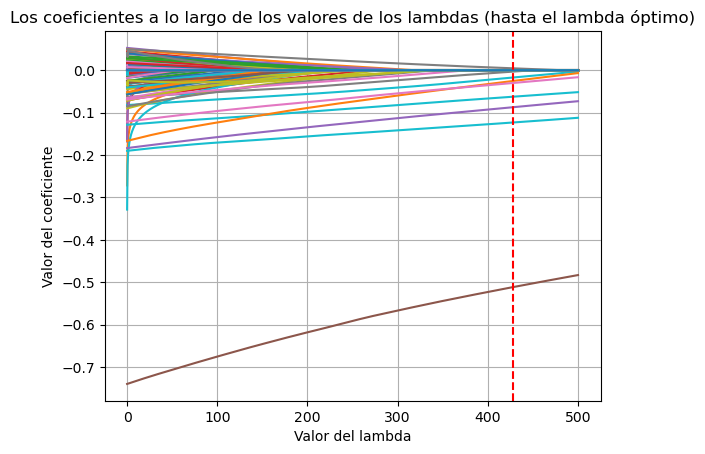

<Figure size 640x480 with 0 Axes>

In [95]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a numpy array 'lambdas' containing your lambda values
# and 'coefficients' is a numpy array with shape (number_of_lambda_values, number_of_features)
# You want to plot coefficients for the first 20 lambdas

# Plot lambda-coefficient graph for all coefficients on the same graph
for feature_index in range(coefficients2.shape[1]):
    plt.plot(lambdas[:l_num], coefficients2[:l_num, feature_index], label=f'Valor del coeficiente {feature_index}')

    # Add a vertical line at x = 16.2
plt.axvline(x=lambda_optimal2, color='red', linestyle='--', label='Vertical Line at x=16.2')

plt.xlabel('Valor del lambda')
plt.ylabel('Valor del coeficiente')
plt.title('Los coeficientes a lo largo de los valores de los lambdas (hasta el lambda óptimo)')
plt.grid(True)
# plt.legend(loc='best')
plt.show()


plt.savefig('G:\\Mi unidad\\PUCP\\2021-2\\TESIS_1\\4_grafico\\coeficiente_lambda_2_completo_1_2.png')

In [107]:
coef_dataframe2= pd.DataFrame(coefficients2)
coef_lambda2 = pd.concat([coef_dataframe2, df_lam2], axis=1)
filtered_coef_df2= coef_lambda2[coef_lambda2['lambda'] == lambda_optimal]

columns_to_drop = ['metric', 'lambda']
filtered_coef_df2.drop(columns=columns_to_drop, inplace=True)

non_zero_values2 = filtered_coef_df2.iloc[0].sort_values()
non_zero_values2

65   -0.717198
69   -0.182477
64   -0.174567
61   -0.149546
59   -0.122711
        ...   
30    0.034351
3     0.037760
11    0.043025
27    0.045835
4     0.045893
Name: 67, Length: 91, dtype: float64

In [108]:
min_value_coef=0.1

non_zero_variable_names2 = non_zero_values2[non_zero_values2.abs() > min_value_coef]

In [98]:
nzvn2 = non_zero_values2[non_zero_values2.abs() > min_value_coef].index.tolist()

In [109]:
# Select columns by index
selected_columns2 = x_test.iloc[:, nzvn2]
#export data
# Export Y DataFrame to CSV
selected_columns2.to_csv('G://Mi unidad//PUCP//2021-2//TESIS_1//3_datos//test_data_var2_1.csv', index=False)

In [110]:
column_info_list2 = list(zip(selected_columns2.columns, nzvn2))
column_info_df2 = pd.DataFrame(column_info_list2, columns=['ColumnName', 'NZVN2'])

m_values_columns2 = pd.merge(column_info_df2, non_zero_values2, left_on='NZVN2', right_index=True)
m_values_columns2

,ColumnName,NZVN2,67
0,y_mkt,65,-0.717198
1,p203_1,69,-0.182477
2,y_sec,64,-0.174567
3,p401h5,61,-0.149546
4,p208a,59,-0.122711
5,ipcr_15,66,-0.112205


In [111]:
absolute_values2 = non_zero_values2.abs().sort_values()
nzvn_102 = absolute_values2.tail(10).index.tolist()

# Select columns by index
selected_columns_102 = x_test.iloc[:, nzvn_102]

#export data
# Export Y DataFrame to CSV
selected_columns_102.to_csv('G://Mi unidad//PUCP//2021-2//TESIS_1//3_datos//test_data_var_1_10.csv', index=False)


In [112]:
column_info_list_102 = list(zip(selected_columns_102.columns, nzvn_102))
column_info_df_102 = pd.DataFrame(column_info_list_102, columns=['ColumnName', 'NZVN'])

m_values_columns_102 = pd.merge(column_info_df_102, absolute_values2, left_on='NZVN', right_index=True)
m_values_columns_102

,ColumnName,NZVN,67
0,dpto_14,47,0.072438
1,p105a_5,38,0.073218
2,p22,9,0.077766
3,p105a_7,39,0.082328
4,ipcr_15,66,0.112205
5,p208a,59,0.122711
6,p401h5,61,0.149546
7,y_sec,64,0.174567
8,p203_1,69,0.182477
9,y_mkt,65,0.717198


In [55]:
# # Import necessary libraries
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming you have a numpy array 'lambdas' containing your lambda values
# # and 'coefficients' is a numpy array with shape (number_of_lambda_values, number_of_features)
# # You want to plot coefficients for the first 20 lambdas

# # Plot lambda-coefficient graph for all coefficients on the same graph
# for feature_index in range(coefficients2.shape[1]):
#     plt.plot(lambdas[:50], coefficients2[:50, feature_index], label=f'Coefficient for Feature {feature_index}')

#     # Add a vertical line at x = 16.2
# plt.axvline(x=lambda_optimal2, color='red', linestyle='--', label='Vertical Line at x=16.2')

# plt.xlabel('Valor del lambda')
# plt.ylabel('Valor del coeficiente')
# plt.title('Los coeficientes al rededor del lambda óptimo')
# plt.grid(True)
# # plt.legend(loc='best')
# plt.show()

# plt.savefig('G:\\Mi unidad\\PUCP\\2021-2\\TESIS_1\\4_grafico\\coeficiente_lambda_2_recortado.png')

 ### 3. Lasso penalizados post-CV usando SMOTE

In [ ]:
training_scores3 = []
testing_scores3 = []
coefficients3 = [] 

In [ ]:
for ind, i in enumerate(lambdas):
    # Create a pipeline with RandomUnderSampler and LogisticRegression with L1 penalty
    reg3 = pl.make_pipeline(
        SMOTE(random_state=your_seed),
        Lasso(alpha=i, copy_X=True, random_state=your_seed)
    )
    
    reg3.fit(x_train, y_train)
    
    skf3 = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=your_seed)
    results3 = cross_validate(reg3, x_train, y_train, groups=groups, cv=skf3, scoring="neg_mean_squared_error", return_train_score=True)
    
    # Append the training and testing score means to the lists
    training_scores3.append(results3['train_score'].mean())
    testing_scores3.append(results3['test_score'].mean())
    
    # Capture the coefficients
    coefficients3.append(reg3.named_steps['lasso'].coef_.flatten())

In [ ]:
training_scores3

In [ ]:
plt.figure(figsize=(18,6))

# plt.plot(np.std(test_metric)+(test_metric), 'bo-', label=r'$score$ Test set + DE', color="darkblue", marker = "o",markersize = 8,  alpha=0.6, linewidth=3)
plt.plot(lambdas, testing_scores3, label=r'$score$ Test set', color="darkred", marker = "o", markersize=8, alpha=0.6, linewidth=3)
# plt.plot((test_metric)-np.std(test_metric), 'bo-', label=r'$score$ Test set - DE', marker = "o", color="darkblue", alpha=0.6, linewidth=3)

plt.plot(lambdas, training_scores3, label=r'$score$ Train set', color="green", marker = "o", markersize=8, alpha=0.6, linewidth=3)

plt.xlabel('Lambda value)'); plt.ylabel(r'$P$')
plt.xlim(0,100)
plt.title('Evaluate Stratified Group CV with different lamdas')
plt.legend(loc='best')
plt.grid()

In [ ]:
#hallamos el lambda que maximiza el precision
df_lam3 = pd.DataFrame(testing_scores3, columns=['metric'])
df_lam3['lambda'] = (lambdas)
lamb_opt3 = df_lam3.loc[df_lam3['metric'].idxmax()]
lambda_optimal3 = lamb_opt3['lambda']
lambda_optimal3

In [ ]:
coefficients3 = np.array(coefficients3)

In [ ]:
# Plot lambda-coefficient graph for all coefficients on the same graph
for feature_index in range(coefficients3.shape[1]):
    plt.plot(lambdas, coefficients3[:, feature_index], label=f'Coefficient for Feature {feature_index}')

plt.xlabel('Lambda Values')
plt.ylabel('Coefficient Value')
plt.title('Lambda vs. Coefficient Value for All Features')
plt.grid(True)
# plt.legend(loc='best')
plt.show()

 ### Lasso penalizados post-CV usando Undersampling

In [ ]:
training_scores4 = []
testing_scores4 = []
coefficients4 = [] 

In [ ]:
for ind, i in enumerate(lambdas):
    # Create a pipeline with RandomUnderSampler and LogisticRegression with L1 penalty
    reg4 = pl.make_pipeline(
        RandomUnderSampler(random_state=your_seed),
        Lasso(alpha=i, copy_X=True, random_state=your_seed)
    )
    
    reg4.fit(x_train, y_train)
    
    skf4 = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=your_seed)
    results4 = cross_validate(reg4, x_train, y_train, groups=groups, cv=skf4, scoring="neg_mean_squared_error", return_train_score=True)
    
    # Append the training and testing score means to the lists
    training_scores4.append(results4['train_score'].mean())
    testing_scores4.append(results4['test_score'].mean())
    
    # Capture the coefficients
    coefficients4.append(reg4.named_steps['lasso'].coef_.flatten())

In [ ]:
plt.figure(figsize=(18,6))

# plt.plot(np.std(test_metric)+(test_metric), 'bo-', label=r'$score$ Test set + DE', color="darkblue", marker = "o",markersize = 8,  alpha=0.6, linewidth=3)
plt.plot(lambdas, testing_scores4, label=r'$score$ Test set', color="darkred", marker = "o", markersize=8, alpha=0.6, linewidth=3)
# plt.plot((test_metric)-np.std(test_metric), 'bo-', label=r'$score$ Test set - DE', marker = "o", color="darkblue", alpha=0.6, linewidth=3)

plt.plot(lambdas, training_scores4, label=r'$score$ Train set', color="green", marker = "o", markersize=8, alpha=0.6, linewidth=3)

plt.xlabel('Lambda value)'); plt.ylabel(r'$P$')
plt.xlim(0,100)
plt.title('Evaluate Stratified Group CV with different lamdas')
plt.legend(loc='best')
plt.grid()

In [ ]:
#hallamos el lambda que maximiza el precision
df_lam4 = pd.DataFrame(testing_scores4, columns=['metric'])
df_lam4['lambda'] = (lambdas)
lamb_opt4 = df_lam4.loc[df_lam4['metric'].idxmax()]
lambda_optimal4 = lamb_opt4['lambda']
lambda_optimal4

In [ ]:
coefficients4 = np.array(coefficients4)

In [ ]:
# Plot lambda-coefficient graph for all coefficients on the same graph
for feature_index in range(coefficients4.shape[1]):
    plt.plot(lambdas, coefficients4[:, feature_index], label=f'Coefficient for Feature {feature_index}')

plt.xlabel('Lambda Values')
plt.ylabel('Coefficient Value')
plt.title('Lambda vs. Coefficient Value for All Features')
plt.grid(True)
# plt.legend(loc='best')
plt.show()

## Estimating the ROC curve with the optimal lamba for each model

## 1. Penalized Logit with Undersampling

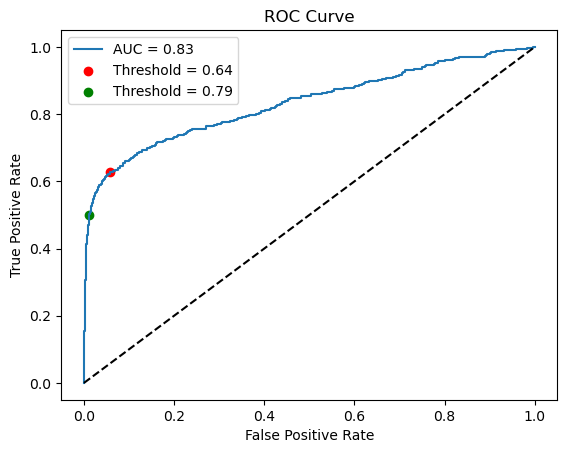

Best threshold that maximizes AUC: 0.64
Threshold for 0.5 TPR/FPR balance: 0.79


In [69]:

# # Create the dataset
X, Y = make_classification(n_samples=100000, n_classes=2, weights=[0.99, 0.01], random_state=1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)  # Use a random state to ensure reproducibility


# Create the pipeline
reg = make_pipeline(
    RandomUnderSampler(random_state=your_seed),
    LogisticRegression(C=1/lambda_optimal, penalty='l1', solver='liblinear', random_state=your_seed)
)

# Fit the model using the training data
reg_log = reg.fit(X_train, Y_train)

# Now, you can use the fitted model for prediction or evaluation
y_pred = reg.predict(X_test)


y_true=Y_test

scores = reg_log.predict_proba(X_test)[:,1]


# ROC
low = min(scores)
high = max(scores)

step = (low+ high)/100

thresholds = np.arange(low, high, step)


from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have true labels and predicted scores
fpr, tpr, thresholds = roc_curve(y_true, scores)

# Calculate AUC-ROC
auc = roc_auc_score(y_true, scores)

# Find the threshold that maximizes AUC
best_threshold = thresholds[np.argmax(tpr - fpr)]

# Threshold for 0.5
threshold_for_05 = thresholds[np.argmin(np.abs(0.5 - tpr))]

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.title("ROC Curve")
plt.savefig('G:\\Mi unidad\\PUCP\\2021-2\\TESIS_1\\4_grafico\\curva_roc_1_1_2.png')

# Add a point at the best threshold
plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], c='red', marker='o', label=f'Threshold = {best_threshold:.2f}')
plt.legend()

# Add a point at the threshold for 0.5
plt.scatter(fpr[np.argmin(np.abs(0.5 - tpr))], tpr[np.argmin(np.abs(0.5 - tpr))], c='green', marker='o', label=f'Threshold = {threshold_for_05:.2f}')
plt.legend()

plt.show()

print(f"Best threshold that maximizes AUC: {best_threshold:.2f}")
print(f"Threshold for 0.5 TPR/FPR balance: {threshold_for_05:.2f}")


##  2. Penalized logit with SMOTE

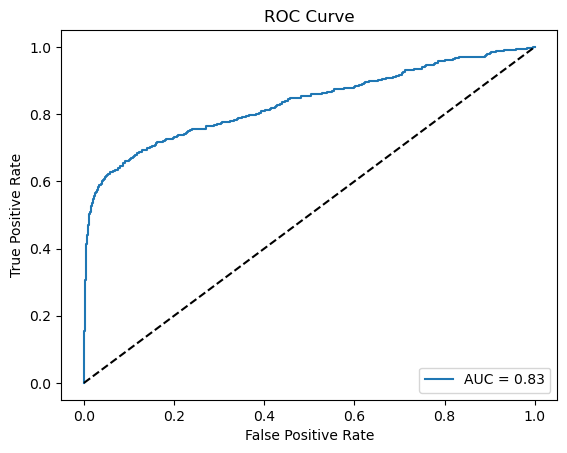

Best threshold that maximizes AUC: 0.64


<Figure size 640x480 with 0 Axes>

In [70]:

# # Create the dataset
X, y = make_classification(n_samples=100000, n_classes=2, weights=[0.99, 0.01], random_state=1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)  # Use a random state to ensure reproducibility

# Create the pipeline
reg2 = make_pipeline(
    SMOTE(random_state=your_seed),
        LogisticRegression(C=1/lambda_optimal2, penalty='l1', solver='liblinear', random_state=your_seed)
)

# Fit the model using the training data
reg2_log = reg2.fit(X_train, Y_train)

# Now, you can use the fitted model for prediction or evaluation
y_pred = reg2.predict(X_test)


y_true=Y_test

scores2 = reg2_log.predict_proba(X_test)[:,1]


# ROC
low = min(scores2)
high = max(scores2)

step = (low+ high)/100

thresholds = np.arange(low, high, step)

TPR=[]
FPR=[]
PRECISION = []
for th in thresholds:
  y_pred = np.array([1 if s>th else 0    for s in scores2])

  #---------
  #implementar precision/recall
  TP = sum(y_pred & y_true)
  TN = sum((1-y_pred) & (1-y_true))
  FP = sum(y_pred & (1-y_true)) 
  #FP = sum((y_pred-y_true)==1) 
  #FP = sum(y_pred) - TP 
  FN =  sum((1-y_pred) & y_true) 

  TPR.append(TP/(TP+FN)) #recall
  FPR.append(FP/(TN+FP))
  PRECISION.append(TP/(TP+FP)) # precision


# import matplotlib.pyplot as plt

# plt.plot(FPR,TPR)
# plt.plot([0,1],[0,1])
# plt.xlabel("FPR")
# plt.ylabel("TPR")
# plt.show()

# from sklearn.metrics import roc_curve, roc_auc_score
# fpr, tpr, thresholds = roc_curve(y_true, scores2)

# plt.plot(fpr,tpr)
# plt.plot([0,1],[0,1])
# plt.xlabel("FPR")
# plt.ylabel("TPR")
# plt.show()

# print("AUC (ROC) :{}".format(roc_auc_score(Y_test, scores2)))


# # precision-recall curve

# import matplotlib.pyplot as plt

# no_skill = len([y[y==1]])/len(y)
# plt.plot(TPR, PRECISION)
# plt.plot([0,1],[no_skill,no_skill])
# plt.xlabel("recall")
# plt.ylabel("precision")
# plt.show()


from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have true labels and predicted scores
fpr, tpr, thresholds = roc_curve(y_true, scores)

# Calculate AUC-ROC
auc = roc_auc_score(y_true, scores)

# Find the threshold that maximizes AUC
best_threshold = thresholds[np.argmax(tpr - fpr)]

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.title("ROC Curve")
plt.show()
plt.savefig('G:\\Mi unidad\\PUCP\\2021-2\\TESIS_1\\4_grafico\\curva_roc_2_1_2.png')



print(f"Best threshold that maximizes AUC: {best_threshold:.2f}")


In [71]:
low = min(scores2)
high = max(scores2)

step = (low+ high)/100

thresholds = np.arange(low, high, step)
thresholds

array([0.00482895, 0.01483023, 0.02483152, 0.0348328 , 0.04483409,
       0.05483537, 0.06483665, 0.07483794, 0.08483922, 0.0948405 ,
       0.10484179, 0.11484307, 0.12484436, 0.13484564, 0.14484692,
       0.15484821, 0.16484949, 0.17485077, 0.18485206, 0.19485334,
       0.20485463, 0.21485591, 0.22485719, 0.23485848, 0.24485976,
       0.25486105, 0.26486233, 0.27486361, 0.2848649 , 0.29486618,
       0.30486746, 0.31486875, 0.32487003, 0.33487132, 0.3448726 ,
       0.35487388, 0.36487517, 0.37487645, 0.38487773, 0.39487902,
       0.4048803 , 0.41488159, 0.42488287, 0.43488415, 0.44488544,
       0.45488672, 0.464888  , 0.47488929, 0.48489057, 0.49489186,
       0.50489314, 0.51489442, 0.52489571, 0.53489699, 0.54489827,
       0.55489956, 0.56490084, 0.57490213, 0.58490341, 0.59490469,
       0.60490598, 0.61490726, 0.62490854, 0.63490983, 0.64491111,
       0.6549124 , 0.66491368, 0.67491496, 0.68491625, 0.69491753,
       0.70491881, 0.7149201 , 0.72492138, 0.73492267, 0.74492

### 3. Lasso penalizados post-CV usando SMOTE

### 4. Lasso penalizados post-CV usando Undersampling

# Using the optimal lambda to estimate the optimal model

In [72]:
## Estimating in the method where we estimated train and tested

### 1. Logit Penalized using undersampling

In [125]:
#uso de pipeline

pipeline_final = pl.make_pipeline(
    RandomUnderSampler(random_state=your_seed),
    LogisticRegression(C=1/lambda_optimal, penalty='l1', solver='liblinear', random_state=your_seed)
    )

pipeline_final.fit(x_train, y_train)
pipeline_final

y_pred_bal = pipeline_final.predict(x_test)

In [126]:
# y_pred_bal 

In [127]:
# predicted_labels = [1 if prob[1] >= 0.175 else 0 for prob in y_pred_bal]
# predicted_labels 

In [128]:
# Step 1: Calculate the sum of all values in the array
# Calculate mean and standard deviation
mean = np.mean(y_pred_bal)
std_dev = np.std(y_pred_bal, ddof=1)  # ddof=1 for sample standard deviation

# Set confidence level and degrees of freedom
confidence_level = 0.95
degrees_of_freedom = len(y_pred_bal) - 1

# Calculate confidence interval
confidence_interval = t.interval(confidence_level, degrees_of_freedom, loc=mean, scale=std_dev/np.sqrt(len(y_pred_bal)))

print("Confidence Interval:", mean)
print("Confidence Interval:", confidence_interval)

Confidence Interval: 0.6140499365213712
Confidence Interval: (0.6001655769671045, 0.6279342960756379)


In [129]:
#metrics para dataset imbalanceados
classification_rep = classification_report_imbalanced(y_test, y_pred_bal)
print(classification_rep)

roc_auc = roc_auc_score(y_test, y_pred_bal)
print(roc_auc)

#son iguales a pesar de aplicar SMOTE 

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.41      0.84      0.58      0.59      0.33      4223
          1       0.15      0.84      0.41      0.25      0.59      0.36       503

avg / total       0.87      0.46      0.80      0.54      0.59      0.34      4726

0.6291902857070224


Confusion Matrix:
[[1746 2477]
 [  78  425]]


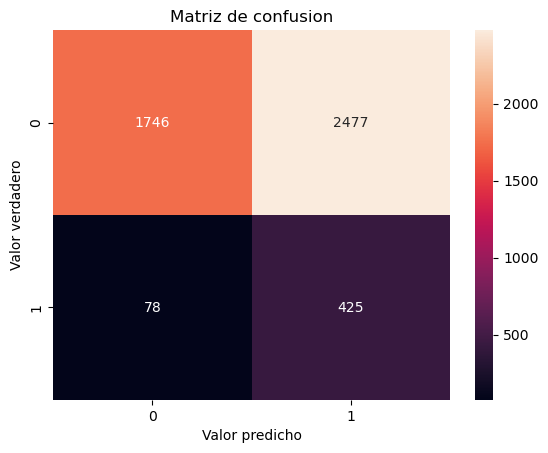

In [130]:

conf_matrix = confusion_matrix(y_test, y_pred_bal)

print("Confusion Matrix:")

ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Valor predicho');ax.set_ylabel('Valor verdadero'); 
ax.set_title('Matriz de confusion'); 
#ax.xaxis.set_ticklabels(['Mantiene bienestar', 'Pierde bienestar']); ax.yaxis.set_ticklabels(['Pierde bienestar', 'Mantiene bienestar']);
print(conf_matrix)


### 2. Logit Penalized using SMOTE

In [137]:
#uso de pipeline

pipeline = pl.make_pipeline(
    SMOTE(random_state=your_seed),
    LogisticRegression(C=1/lambda_optimal2, penalty='l1', solver='liblinear', random_state=your_seed)
    )
#1.822273
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

pipeline.fit(x_train, y_train)
pipeline

y_pred_bal = pipeline.predict(x_test)

# y_pred_bal 

In [138]:
# predicted_labels = [1 if prob[1] >= 0.175 else 0 for prob in y_pred_bal]
# predicted_labels 

In [139]:
# Step 1: Calculate the sum of all values in the array
# Calculate mean and standard deviation
mean = np.mean(y_pred_bal)
std_dev = np.std(y_pred_bal, ddof=1)  # ddof=1 for sample standard deviation

# Set confidence level and degrees of freedom
confidence_level = 0.95
degrees_of_freedom = len(y_pred_bal) - 1

# Calculate confidence interval
confidence_interval = t.interval(confidence_level, degrees_of_freedom, loc=mean, scale=std_dev/np.sqrt(len(y_pred_bal)))

print("Confidence Interval:", mean)
print("Confidence Interval:", confidence_interval)

Confidence Interval: 0.6015658061785866
Confidence Interval: (0.5876028195992294, 0.6155287927579437)


In [140]:
#append selected column con coefficients para ver quienes se van

In [141]:
print(classification_report_imbalanced(y_test, y_pred_bal))
print(roc_auc_score(y_test, y_pred_bal))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.42      0.82      0.59      0.59      0.33      4223
          1       0.14      0.82      0.42      0.25      0.59      0.36       503

avg / total       0.87      0.47      0.78      0.55      0.59      0.34      4726

0.6217141856415379


Confusion Matrix:
[[1792 2431]
 [  91  412]]


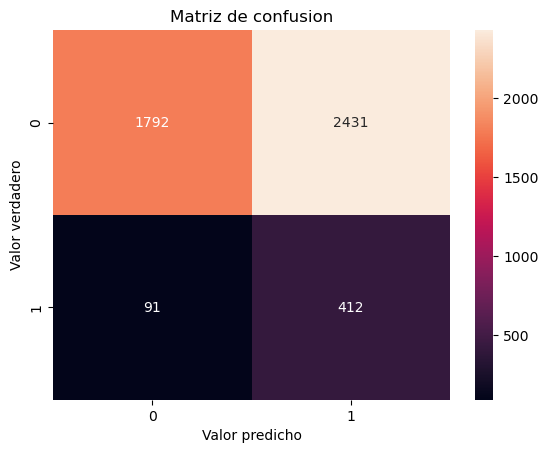

In [142]:
conf_matrix = confusion_matrix(y_test, y_pred_bal)

print("Confusion Matrix:")

ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Valor predicho');ax.set_ylabel('Valor verdadero'); 
ax.set_title('Matriz de confusion'); 
#ax.xaxis.set_ticklabels(['Mantiene bienestar', 'Pierde bienestar']); ax.yaxis.set_ticklabels(['Pierde bienestar', 'Mantiene bienestar']);
print(conf_matrix)